In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error

In [2]:
#Load the data
df_train=pd.read_csv('../Datasets/house_price_dataset/train.csv',keep_default_na=False)
df_test=pd.read_csv('../Datasets/house_price_dataset/test.csv',keep_default_na=False)

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [5]:
df_train['Alley']. unique()

array(['NA', 'Grvl', 'Pave'], dtype=object)

In [6]:
#Create the na dictionary 
na_dict1= {}
for col in df_train.columns:
    if 'NA' in df_train[col].unique():
       na_dict1[col]=['']

<ipython-input-6-cecd1294f0b7>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'NA' in df_train[col].unique():


In [7]:
na_dict1

{'LotFrontage': [''],
 'Alley': [''],
 'MasVnrType': [''],
 'MasVnrArea': [''],
 'BsmtQual': [''],
 'BsmtCond': [''],
 'BsmtExposure': [''],
 'BsmtFinType1': [''],
 'BsmtFinType2': [''],
 'Electrical': [''],
 'FireplaceQu': [''],
 'GarageType': [''],
 'GarageYrBlt': [''],
 'GarageFinish': [''],
 'GarageQual': [''],
 'GarageCond': [''],
 'PoolQC': [''],
 'Fence': [''],
 'MiscFeature': ['']}

In [8]:
na_dict1['BsmtFinType2'].append('NA')
na_dict1['Electrical'].append('NA')
na_dict1['GarageYrBlt'].append('NA')
na_dict1['LotFrontage'].append('NA')
na_dict1['MasVnrArea'].append('NA')
na_dict1['MasVnrType'].append('NA')

In [9]:
na_dict1

{'LotFrontage': ['', 'NA'],
 'Alley': [''],
 'MasVnrType': ['', 'NA'],
 'MasVnrArea': ['', 'NA'],
 'BsmtQual': [''],
 'BsmtCond': [''],
 'BsmtExposure': [''],
 'BsmtFinType1': [''],
 'BsmtFinType2': ['', 'NA'],
 'Electrical': ['', 'NA'],
 'FireplaceQu': [''],
 'GarageType': [''],
 'GarageYrBlt': ['', 'NA'],
 'GarageFinish': [''],
 'GarageQual': [''],
 'GarageCond': [''],
 'PoolQC': [''],
 'Fence': [''],
 'MiscFeature': ['']}

In [10]:
df_train1=pd.read_csv('../Datasets/house_price_dataset/train.csv',na_values=na_dict1,keep_default_na=False)

In [11]:
df_train1.drop('Id',axis=1,inplace=True)

In [12]:
df_train1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [13]:
#list of object columns
list_obj_cols_tr=list(df_train1.select_dtypes(include='object').columns)
#list of numerical columns
list_num_cols_tr=list(df_train1.select_dtypes(exclude='object').columns)

In [14]:
list_num_cols_tr.remove('SalePrice')

In [15]:
for col in list_obj_cols_tr:
    print (col,df_train1[col].nunique())

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


In [16]:
df_train1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [17]:
 na_dict2= {}
for col in df_test.columns:
    if 'NA' in df_test[col].unique():
       na_dict2[col]=['']

<ipython-input-17-c82944de0ab9>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'NA' in df_test[col].unique():


In [18]:
na_dict2

{'MSZoning': [''],
 'LotFrontage': [''],
 'Alley': [''],
 'Utilities': [''],
 'Exterior1st': [''],
 'Exterior2nd': [''],
 'MasVnrType': [''],
 'MasVnrArea': [''],
 'BsmtQual': [''],
 'BsmtCond': [''],
 'BsmtExposure': [''],
 'BsmtFinType1': [''],
 'BsmtFinSF1': [''],
 'BsmtFinType2': [''],
 'BsmtFinSF2': [''],
 'BsmtUnfSF': [''],
 'TotalBsmtSF': [''],
 'BsmtFullBath': [''],
 'BsmtHalfBath': [''],
 'KitchenQual': [''],
 'Functional': [''],
 'FireplaceQu': [''],
 'GarageType': [''],
 'GarageYrBlt': [''],
 'GarageFinish': [''],
 'GarageCars': [''],
 'GarageArea': [''],
 'GarageQual': [''],
 'GarageCond': [''],
 'PoolQC': [''],
 'Fence': [''],
 'MiscFeature': [''],
 'SaleType': ['']}

In [19]:
na_dict2['BsmtFinSF1'].append('NA')
na_dict2['BsmtFinSF2'].append('NA')
na_dict2['BsmtFinType2'].append('NA')
na_dict2['BsmtFullBath']. append ('NA')
na_dict2['BsmtHalfBath'].append('NA')
na_dict2['BsmtUnfSF'].append('NA')
na_dict2['Exterior1st'].append('NA')
na_dict2['Exterior2nd'].append('NA')
na_dict2['Functional'].append('NA')
na_dict2['GarageArea'].append('NA')
na_dict2['GarageCars'].append('NA')
na_dict2['GarageYrBlt'].append('NA')
na_dict2['KitchenQual'].append('NA')
na_dict2['LotFrontage'].append('NA')
na_dict2['MSZoning'].append('NA')
na_dict2['MasVnrArea'].append('NA')
na_dict2['SaleType'].append('NA')
na_dict2['TotalBsmtSF'].append('NA')
na_dict2['Utilities'].append('NA')

In [20]:
na_dict2

{'MSZoning': ['', 'NA'],
 'LotFrontage': ['', 'NA'],
 'Alley': [''],
 'Utilities': ['', 'NA'],
 'Exterior1st': ['', 'NA'],
 'Exterior2nd': ['', 'NA'],
 'MasVnrType': [''],
 'MasVnrArea': ['', 'NA'],
 'BsmtQual': [''],
 'BsmtCond': [''],
 'BsmtExposure': [''],
 'BsmtFinType1': [''],
 'BsmtFinSF1': ['', 'NA'],
 'BsmtFinType2': ['', 'NA'],
 'BsmtFinSF2': ['', 'NA'],
 'BsmtUnfSF': ['', 'NA'],
 'TotalBsmtSF': ['', 'NA'],
 'BsmtFullBath': ['', 'NA'],
 'BsmtHalfBath': ['', 'NA'],
 'KitchenQual': ['', 'NA'],
 'Functional': ['', 'NA'],
 'FireplaceQu': [''],
 'GarageType': [''],
 'GarageYrBlt': ['', 'NA'],
 'GarageFinish': [''],
 'GarageCars': ['', 'NA'],
 'GarageArea': ['', 'NA'],
 'GarageQual': [''],
 'GarageCond': [''],
 'PoolQC': [''],
 'Fence': [''],
 'MiscFeature': [''],
 'SaleType': ['', 'NA']}

In [21]:
df_test1=pd.read_csv('../Datasets/house_price_dataset/test.csv',na_values=na_dict2,keep_default_na=False)

In [22]:
test_Id =df_test1.Id
df_test1.drop('Id',axis=1,inplace=True)

In [23]:
#list of object columns
list_obj_cols_te=list(df_test1.select_dtypes(include='object').columns)
#list of numerical columns
list_num_cols_te=list(df_test1.select_dtypes(exclude='object').columns)

In [24]:
for col in list_obj_cols_te:
    print (col,df_test1[col].nunique())

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 1
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
RoofStyle 6
RoofMatl 4
Exterior1st 13
Exterior2nd 15
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 6
Heating 4
HeatingQC 5
CentralAir 2
Electrical 4
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 5
GarageCond 6
PavedDrive 3
PoolQC 3
Fence 5
MiscFeature 4
SaleType 9
SaleCondition 6


In [25]:
import seaborn as sns

In [26]:
#define function for fill na values
def fillna_all (df):
    for col in list_obj_cols_tr:
        df[col].fillna(value=df[col].mode()[0], inplace=True)
    for col in list_num_cols_tr:               
        df[col].fillna(value=df[col].median(),inplace=True)
    for col in list_obj_cols_te:
        df[col].fillna(value=df[col].mode()[0], inplace=True)
    for col in list_num_cols_te:               
        df[col].fillna(value=df[col].median(),inplace=True)

In [27]:
fillna_all(df_train1)
fillna_all(df_test1)

In [28]:
#feature encoding for train
dummy_tr = pd.get_dummies(df_train1[list_obj_cols_tr], prefix=list_obj_cols_tr)
#feature encoding for test
dummy_te = pd.get_dummies(df_test1[list_obj_cols_te], prefix=list_obj_cols_te)

In [29]:
dummy_tr.shape , dummy_te.shape

((1460, 265), (1459, 248))

In [30]:
not_in_test=set(dummy_tr.columns)-set(dummy_te)

In [31]:
for col in not_in_test:
  dummy_te[col]=0

In [32]:
dummy_te[not_in_test]

,Utilities_NoSeWa,Heating_OthW,RoofMatl_ClyTile,Condition2_RRAe,HouseStyle_2.5Fin,RoofMatl_Roll,Condition2_RRAn,Condition2_RRNn,PoolQC_Fa,Exterior2nd_Other,RoofMatl_Membran,Exterior1st_ImStucc,GarageQual_Ex,RoofMatl_Metal,MiscFeature_TenC,Heating_Floor,Exterior1st_Stone,Electrical_Mix
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df_train1.drop(list_obj_cols_tr,axis=1, inplace=True)
df_test1.drop(list_obj_cols_te,axis=1, inplace=True)

In [34]:
df_train_final=pd.concat([df_train1, dummy_tr],axis=1)
df_test_final=pd.concat([df_test1, dummy_te],axis=1)

In [35]:
df_train_final.shape, df_test_final.shape

((1460, 302), (1459, 302))

In [36]:
df_train_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
df_train_final['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [38]:
df_test_final.shape

(1459, 302)

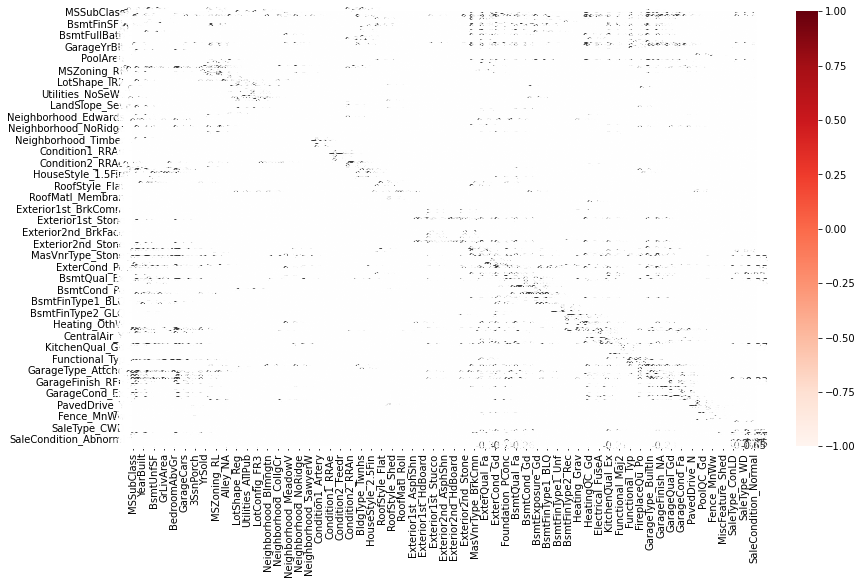

In [39]:
plt.figure(figsize=(14,8))
cor = df_train_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [40]:
import numpy as np

In [41]:
predictors = df_train_final.drop(['SalePrice'], axis = 1) 
criterion = df_train_final['SalePrice']

In [42]:
 predictors.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [43]:
 #Identification of highly correlated features
 threshold = 0.8
 
def high_cor_function(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [44]:
 high_cor_function(predictors)

max corr: 1.0 , min corr:  -1.0


SaleCondition_Partial  SaleType_New           0.986819
BsmtFinType1_NA        BsmtExposure_NA        0.986408
BsmtCond_NA            BsmtExposure_NA        0.986408
Exterior1st_VinylSd    Exterior2nd_VinylSd    0.977525
Exterior1st_CemntBd    Exterior2nd_CmentBd    0.974171
Exterior2nd_MetalSd    Exterior1st_MetalSd    0.973065
MiscVal                MiscFeature_Gar2       0.885427
Exterior2nd_HdBoard    Exterior1st_HdBoard    0.883271
GarageCars             GarageArea             0.882475
Neighborhood_Somerst   MSZoning_FV            0.862807
Exterior2nd_Wd Sdng    Exterior1st_Wd Sdng    0.859244
Exterior2nd_AsbShng    Exterior1st_AsbShng    0.847917
RoofStyle_Flat         RoofMatl_Tar&Grv       0.834914
GrLivArea              TotRmsAbvGrd           0.825489
1stFlrSF               TotalBsmtSF            0.819530
GarageQual_Ex          GarageCond_Ex          0.816217
2ndFlrSF               HouseStyle_2Story      0.809150
BsmtFinType1_NA        Foundation_Slab        0.801733
dtype: flo

In [45]:
correlated_features=set()
correlation_matrix=df_train_final.corr()

In [46]:
threshold = 0.9
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>threshold:
      colname=correlation_matrix.columns[i]
      correlated_features.add(colname)

In [47]:
len(correlated_features)

21

In [48]:
print(correlated_features)

{'LotShape_Reg', 'GarageFinish_NA', 'Street_Pave', 'Exterior2nd_CBlock', 'RoofStyle_Hip', 'Utilities_NoSeWa', 'LandSlope_Mod', 'SaleCondition_Partial', 'Exterior2nd_MetalSd', 'ExterQual_TA', 'MiscFeature_Shed', 'Exterior2nd_VinylSd', 'GarageCond_NA', 'BsmtCond_NA', 'BsmtFinType1_NA', 'BsmtExposure_NA', 'CentralAir_Y', 'GarageQual_NA', 'FireplaceQu_NA', 'PoolQC_NA', 'Exterior2nd_CmentBd'}


In [49]:
predictors1=predictors.drop(labels=correlated_features, axis = 1)
X_cols_test=df_test_final.drop(labels=correlated_features,axis=1)

In [50]:
cor = df_train_final.corr()

In [51]:
#Correlations with the output variable
threshold=0.25
cor_criterion =abs(cor["SalePrice"])
relevant_features = cor_criterion[cor_criterion>threshold]
relevant_features = relevant_features.reset_index()
relevant_features.columns=['Variables','Correlation']
relevant_features = relevant_features.sort_values(by='Correlation',ascending=False)
relevant_features

,Variables,Correlation
20,SalePrice,1.000000
2,OverallQual,0.790982
10,GrLivArea,0.708624
16,GarageCars,0.640409
17,GarageArea,0.623431
7,TotalBsmtSF,0.613581
8,1stFlrSF,0.605852
31,ExterQual_TA,0.589044
11,FullBath,0.560664
34,BsmtQual_Ex,0.553105


In [52]:
X_corr_fet=relevant_features['Variables']

Build ML Model

In [53]:
X_cols=list(df_train_final[X_corr_fet])
y_col= 'SalePrice'

In [54]:
X_cols.remove('SalePrice')

In [55]:
X=df_train_final[X_cols]
y=df_train_final[y_col]

In [56]:
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,BsmtQual_Ex,TotRmsAbvGrd,...,Exterior1st_VinylSd,MSZoning_RM,HalfBath,GarageCond_TA,LotShape_Reg,LotArea,BsmtExposure_No,FireplaceQu_Ex,CentralAir_Y,CentralAir_N
0,7,1710,2,548,856,856,0,2,0,8,...,1,0,1,1,1,8450,1,0,1,0
1,6,1262,2,460,1262,1262,1,2,0,6,...,0,0,0,1,1,9600,0,0,1,0
2,7,1786,2,608,920,920,0,2,0,6,...,1,0,1,1,0,11250,0,0,1,0
3,7,1717,3,642,756,961,1,1,0,7,...,0,0,0,1,0,9550,1,0,1,0
4,8,2198,3,836,1145,1145,0,2,0,9,...,1,0,1,1,0,14260,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,1,2,0,7,...,1,0,1,1,1,7917,1,0,1,0
1456,6,2073,2,500,1542,2073,1,2,0,7,...,0,0,0,1,1,13175,1,0,1,0
1457,7,2340,1,252,1152,1188,0,2,0,9,...,0,0,0,1,1,9042,1,0,1,0
1458,5,1078,1,240,1078,1078,1,1,0,5,...,0,0,0,1,1,9717,0,0,1,0


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.30, random_state=30)
X_train.shape, X_val.shape

((1022, 55), (438, 55))

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
#without hyperparameter tunning
model= RandomForestRegressor (random_state=96)
model.fit(X_train,y_train)
model.score(X_val,y_val)

0.8459925449292689

In [60]:
 #hypyerparameter tunning
param_grid = {'n_estimators': [100,500,1000],
    'max_features' : ["auto", "sqrt", "log2"],
    'min_samples_leaf' : [1,2,3],
     'max_depth' : [200,250,300]}
 
from sklearn.model_selection import GridSearchCV
CV_rfR = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10, n_jobs = -1)
CV_rfR.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=96), n_jobs=-1,
             param_grid={'max_depth': [200, 250, 300],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]})

In [61]:
CV_rfR.best_params_

{'max_depth': 200,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [62]:
#with hyperparameter tunning
model= RandomForestRegressor (max_depth= 200,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 100,random_state=96)
model.fit(X_train,y_train)
model.score(X_val,y_val)

0.8621994621927623

In [63]:
X_test_cols=df_test_final[X_cols]

In [64]:
model_final = RandomForestRegressor (max_depth= 200,max_features= 'sqrt',min_samples_leaf= 1,n_estimators= 500)
model_final.fit(X,y)
y_pre=model_final.predict(df_test_final[X_cols])
y_pre

array([128246.498, 149309.51 , 181229.456, ..., 158567.132, 111959.1  ,
       224066.224])

In [65]:
 from sklearn.metrics import mean_squared_log_error

In [66]:
 mean_squared_log_error(y[:-1],y_pre)

0.2784825096377072

In [67]:
prediction= pd.DataFrame({'Id': test_Id, 'SalePrice':y_pre})
print(prediction)
 
prediction.to_csv('prediction_House_Price.csv', index = False)

        Id   SalePrice
0     1461  128246.498
1     1462  149309.510
2     1463  181229.456
3     1464  186803.298
4     1465  190255.910
...    ...         ...
1454  2915   86406.394
1455  2916   89851.400
1456  2917  158567.132
1457  2918  111959.100
1458  2919  224066.224

[1459 rows x 2 columns]
